In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [7]:
history = model.fit(train_images, train_labels, epochs=50, batch_size=512, validation_split=0.4)

Epoch 1/50
71/71 [==============================] - 35s 471ms/step - loss: 1.3323 - accuracy: 0.5277 - val_loss: 0.6580 - val_accuracy: 0.7463
Epoch 2/50
71/71 [==============================] - 32s 456ms/step - loss: 0.7487 - accuracy: 0.7256 - val_loss: 0.5489 - val_accuracy: 0.7864
Epoch 3/50
71/71 [==============================] - 38s 532ms/step - loss: 0.6313 - accuracy: 0.7671 - val_loss: 0.4851 - val_accuracy: 0.8221
Epoch 4/50
71/71 [==============================] - 33s 464ms/step - loss: 0.5687 - accuracy: 0.7906 - val_loss: 0.4479 - val_accuracy: 0.8356
Epoch 5/50
71/71 [==============================] - 32s 447ms/step - loss: 0.5273 - accuracy: 0.8099 - val_loss: 0.4210 - val_accuracy: 0.8445
Epoch 6/50
71/71 [==============================] - 33s 464ms/step - loss: 0.4948 - accuracy: 0.8230 - val_loss: 0.3974 - val_accuracy: 0.8516
Epoch 7/50
71/71 [==============================] - 32s 456ms/step - loss: 0.4674 - accuracy: 0.8347 - val_loss: 0.3849 - val_accuracy: 0.8587

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.3039 - accuracy: 0.9030
Test accuracy: 0.902999997138977


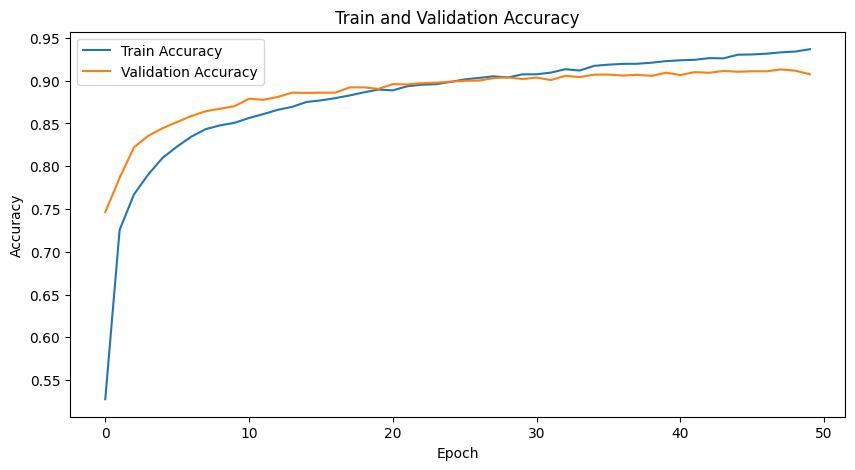

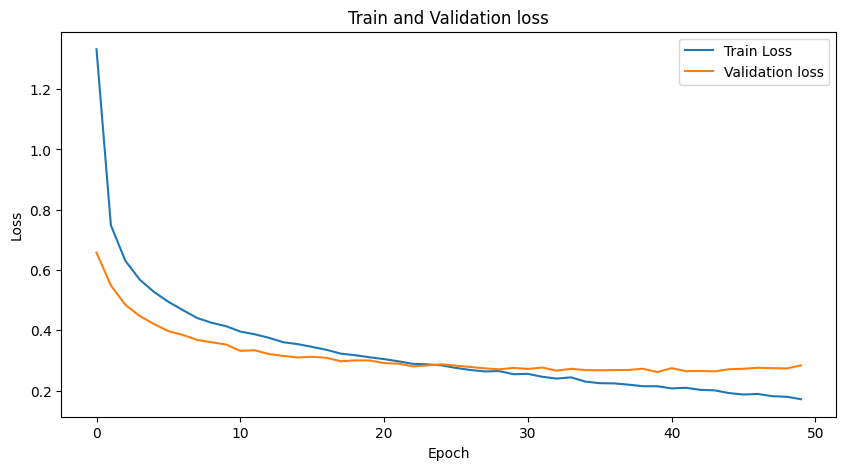

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Train and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Висновок**

Багатошарова мережа:

Точність на тестовому наборі: 87.61%.Втрати на тестовому наборі: 0.36

Згорткова мережа:

Точність на тестовому наборі: 90.3% Втрати на тестовому наборі: 0.30



---


Згорткова мережа показала кращу точність на тестовому наборі даних Fashion MNIST у порівнянні з багатошаровою мережею.


Згорткові нейронні мережі є ефективними для обробки зображень через їхню спеціалізацію на виявленні різних ознак та шаблонів у зображеннях за допомогою згорткових шарів. Ця спеціалізація допомагає їм ефективно впоратися з класифікацією зображень, які містять об'єкти з різними положеннями та текстурами.

Хоча згорткові мережі можуть мати більше параметрів і вимагати більше обчислювальних ресурсів, вони зазвичай досягають кращих результатів у порівнянні з багатошаровими мережами для завдань класифікації зображень, завдяки їхній архітектурі, спеціалізованій на обробці зображень.

Отже, згорткова мережа є більш ефективною для класифікації зображень, і в даному випадку вона досягає вищої точності порівняно з багатошаровою мережею.


